# Analysis of FF corrections

This sheet reports some analysis of the corrections to the torsional parameters.

In [1]:
import math
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# grab list of names for double checking:
data="""
mybias: MATHEVAL ARG=kbt,sumcosalpha,sumcosbeta,sumcosgamma,sumcosdelta,sumcosepsilon,sumcoszeta,sumsinalpha,sumsinbeta,sumsingamma,sumsindelta,sumsinepsilon,sumsinzeta,pursumcoschi,pyrsumcoschi,pursumsinchi,pyrsumsinchi,2sumcosalpha,2sumcosbeta,2sumcosgamma,2sumcosdelta,2sumcosepsilon,2sumcoszeta,2sumsinalpha,2sumsinbeta,2sumsingamma,2sumsindelta,2sumsinepsilon,2sumsinzeta,2pursumcoschi,2pyrsumcoschi,2pursumsinchi,2pyrsumsinchi,3sumcosalpha,3sumcosbeta,3sumcosgamma,3sumcosdelta,3sumcosepsilon,3sumcoszeta,3sumsinalpha,3sumsinbeta,3sumsingamma,3sumsindelta,3sumsinepsilon,3sumsinzeta,3pursumcoschi,3pyrsumcoschi,3pursumsinchi,3pyrsumsinchi VAR=kbt,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48 FUNC=kbt*((0.028743*v1)+(-0.118088*v2)+(0.369240*v3)+(-0.068875*v4)+(-0.061779*v5)+(-0.083563*v6)+(0.045960*v7)+(-0.085707*v8)+(0.080645*v9)+(-0.011406*v10)+(0.038967*v11)+(0.220101*v12)+(-0.007880*v13)+(0.067727*v14)+(-0.086418*v15)+(-0.014430*v16)+(-0.135683*v17)+(0.199287*v18)+(-0.269494*v19)+(0.035808*v20)+(0.086680*v21)+(0.091654*v22)+(0.064641*v23)+(0.008920*v24)+(0.190771*v25)+(-0.109477*v26)+(0.054064*v27)+(0.150732*v28)+(-0.054599*v29)+(-0.116106*v30)+(-0.073151*v31)+(-0.046067*v32)+(0.122662*v33)+(-0.064958*v34)+(-0.001949*v35)+(0.109930*v36)+(0.042434*v37)+(0.061681*v38)+(0.032150*v39)+(0.016087*v40)+(0.020993*v41)+(0.051061*v42)+(-0.077758*v43)+(0.015956*v44)+(0.016977*v45)+(0.037457*v46)+(0.143994*v47)+(0.140334*v48)) PERIODIC=NO
"""
names=re.search("ARG=([^ ]*) ",data).group(1).split(",")
names=names[1:]
print(names)

['sumcosalpha', 'sumcosbeta', 'sumcosgamma', 'sumcosdelta', 'sumcosepsilon', 'sumcoszeta', 'sumsinalpha', 'sumsinbeta', 'sumsingamma', 'sumsindelta', 'sumsinepsilon', 'sumsinzeta', 'pursumcoschi', 'pyrsumcoschi', 'pursumsinchi', 'pyrsumsinchi', '2sumcosalpha', '2sumcosbeta', '2sumcosgamma', '2sumcosdelta', '2sumcosepsilon', '2sumcoszeta', '2sumsinalpha', '2sumsinbeta', '2sumsingamma', '2sumsindelta', '2sumsinepsilon', '2sumsinzeta', '2pursumcoschi', '2pyrsumcoschi', '2pursumsinchi', '2pyrsumsinchi', '3sumcosalpha', '3sumcosbeta', '3sumcosgamma', '3sumcosdelta', '3sumcosepsilon', '3sumcoszeta', '3sumsinalpha', '3sumsinbeta', '3sumsingamma', '3sumsindelta', '3sumsinepsilon', '3sumsinzeta', '3pursumcoschi', '3pyrsumcoschi', '3pursumsinchi', '3pyrsumsinchi']


In [3]:
# list of multipliers:
lag=np.ones(49)
lag[1]=0.0287429
lag[2]=-0.118088
lag[3]=0.36924
lag[4]=-0.0688751
lag[5]=-0.0617793
lag[6]=-0.0835629
lag[7]=0.04596
lag[8]=-0.0857072
lag[9]=0.0806448
lag[10]=-0.0114061
lag[11]=0.0389671
lag[12]=0.220101
lag[13]=-0.0078801
lag[14]=0.0677268
lag[15]=-0.0864179
lag[16]=-0.0144299
lag[17]=-0.135683
lag[18]=0.199287
lag[19]=-0.269494
lag[20]=0.0358081
lag[21]=0.0866801
lag[22]=0.0916538
lag[23]=0.0646414
lag[24]=0.00892007
lag[25]=0.190771
lag[26]=-0.109477
lag[27]=0.0540643
lag[28]=0.150732
lag[29]=-0.0545985
lag[30]=-0.116106
lag[31]=-0.0731506
lag[32]=-0.0460672
lag[33]=0.122662
lag[34]=-0.0649582
lag[35]=-0.00194904
lag[36]=0.10993
lag[37]=0.0424341
lag[38]=0.0616814
lag[39]=0.0321497
lag[40]=0.0160872
lag[41]=0.0209927
lag[42]=0.0510608
lag[43]=-0.0777578
lag[44]=0.0159556
lag[45]=0.0169775
lag[46]=0.0374566
lag[47]=0.143994
lag[48]=0.140334
lag=lag[1:]

In [4]:
# grid for plotting
theta=np.linspace(-np.pi,np.pi,120)

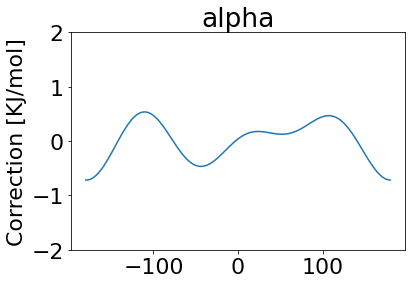

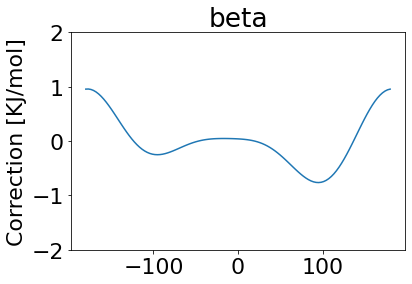

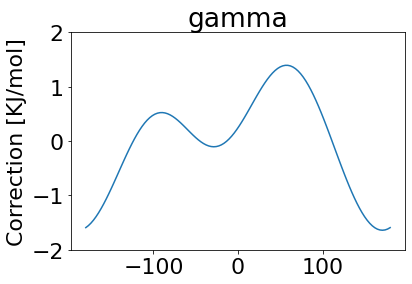

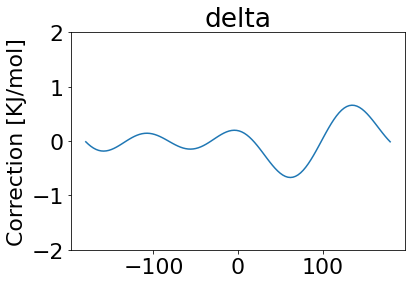

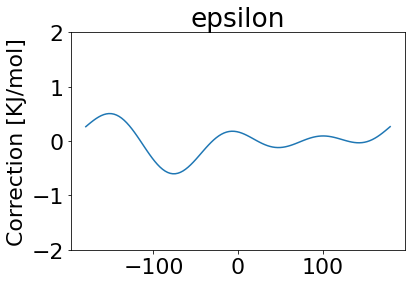

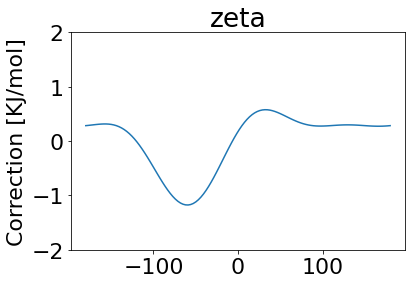

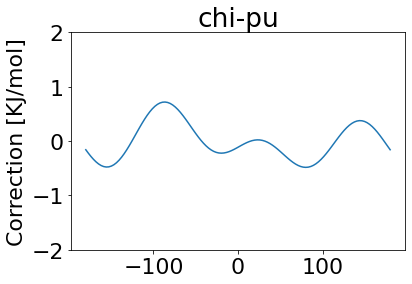

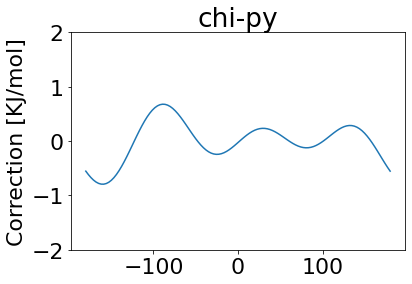

In [5]:
plt.rcParams.update({'font.size': 22})

functions=[]

def getfunc(i,j,name):
    assert(re.match("[a-z]*sumsin.*",names[j]))
    assert(re.match("2[a-z]*sumsin.*",names[16+j]))
    assert(re.match("3[a-z]*sumsin.*",names[32+j]))
    assert(re.match("[a-z]*sumcos.*",names[i]))
    assert(re.match("2[a-z]*sumcos.*",names[16+i]))
    assert(re.match("3[a-z]*sumcos.*",names[32+i]))
    if(name=="chi-pu"):
        assert(names[j]=="pursumsinchi")
        assert(names[16+j]=="2pursumsinchi")
        assert(names[32+j]=="3pursumsinchi")
        assert(names[i]=="pursumcoschi")
        assert(names[16+i]=="2pursumcoschi")
        assert(names[32+i]=="3pursumcoschi")
    elif(name=="chi-py"):
        assert(names[j]=="pyrsumsinchi")
        assert(names[16+j]=="2pyrsumsinchi")
        assert(names[32+j]=="3pyrsumsinchi")
        assert(names[i]=="pyrsumcoschi")
        assert(names[16+i]=="2pyrsumcoschi")
        assert(names[32+i]=="3pyrsumcoschi")
    else:
        assert re.match(".*"+name+".*",names[j])
        assert re.match(".*"+name+".*",names[j+16])
        assert re.match(".*"+name+".*",names[j+32])
        assert re.match(".*"+name+".*",names[i])
        assert re.match(".*"+name+".*",names[i+16])
        assert re.match(".*"+name+".*",names[i+32])
        
    func=2.5*(lag[i]*np.cos(theta)+lag[j]*np.sin(theta)
            +lag[i+16]*np.cos(2*theta)+lag[16+j]*np.sin(2*theta)
            +lag[i+32]*np.cos(3*theta)+lag[32+j]*np.sin(3*theta))
    return [name,func]

functions.append(getfunc(0,6,"alpha"))
functions.append(getfunc(1,7,"beta"))
functions.append(getfunc(2,8,"gamma"))
functions.append(getfunc(3,9,"delta"))
functions.append(getfunc(4,10,"epsilon"))
functions.append(getfunc(5,11,"zeta"))
functions.append(getfunc(12,14,"chi-pu"))
functions.append(getfunc(13,15,"chi-py"))

for f in functions:
    plt.title(f[0])
    plt.ylim((-2,2))
    plt.ylabel("Correction [KJ/mol]")
    plt.plot(theta/np.pi*180,f[1])
    plt.show()

In [6]:
print("Stddev and root mean square (KJ/mol)")
for f in functions:
    print("%10s %6.4f %6.4f"%(f[0],np.std(f[1]),np.sqrt(np.sum(f[1]**2)/len(f[1]))))

Stddev and root mean square (KJ/mol)
     alpha 0.3650 0.3650
      beta 0.4591 0.4591
     gamma 0.8960 0.8961
     delta 0.3190 0.3190
   epsilon 0.2716 0.2716
      zeta 0.5305 0.5305
    chi-pu 0.3384 0.3384
    chi-py 0.3621 0.3621


In [7]:
print("Average corrections per dihedral (KJ/mol)")
a=[]
for f in functions:
        a.append(f[1])
print("%6.4f"%(np.std(a)))

Average corrections per dihedral (KJ/mol)
0.4808


Notice that in the paper this was erroneously reported as 0.68 (there is an extra sqrt(2)).

In [8]:
print("Average difference between chi-pu and chi-py (KJ/mol)")
for f in functions:
    for g in functions:
        if(f[0]=="chi-pu" and g[0]=="chi-py"):
            print("%6.4f"%(np.std(f[1]-g[1])))

Average difference between chi-pu and chi-py (KJ/mol)
0.2245
